<a href="https://colab.research.google.com/github/Nouman97/Computer-Vision/blob/master/Computer_Vision_Nanodegree_Module_1_1_3_Types_of_Image_Features_and_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # used to manipulate tensor data (like matrices)

import matplotlib.image as mpimg # can be used to read and manipulate images
# (will read in RGB format)

import matplotlib.pyplot as plt # used to make plots

%matplotlib inline 

import cv2 # computer vision library (reads images in BGR format)

import os # used to work with directories

# *1.3 Types of Image Features and Image Segmentation*

---

In [2]:
# to load data from google drive, we can use this command set

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# path where images are stored

image_directory = '/content/gdrive/My Drive/CVND_Exercises-master/1_3_Types_of_Features_Image_Segmentation/images'

# 1. Haris Corner Detection

(183, 276, 3)


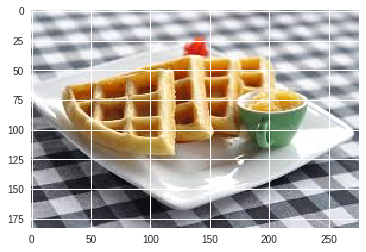

In [0]:
# image of a waffle

waffle = cv2.imread(os.path.join(image_directory, 'waffle.jpg'))

# converting from BGR to RGB

waffle_1 = np.copy(waffle)
waffle_1 = cv2.cvtColor(waffle_1, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(waffle_1)

print(waffle.shape)

uint8
float32
float32
float32


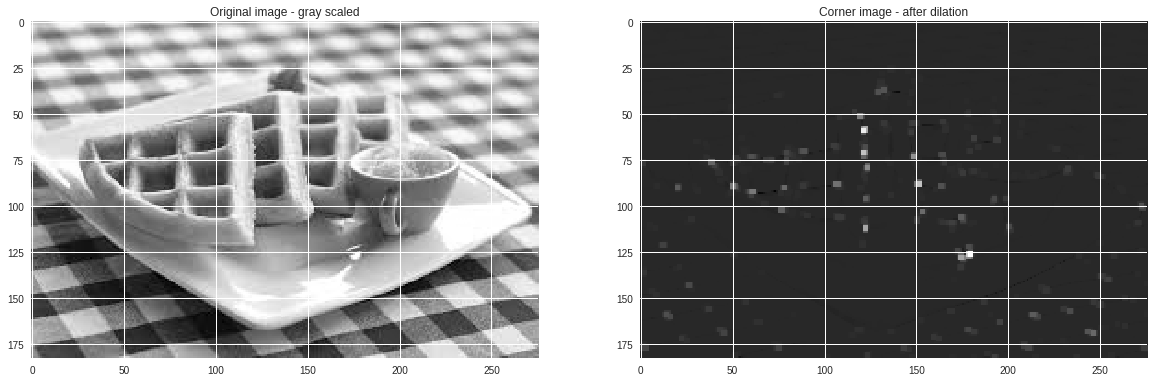

In [0]:
# corner detection

# converting to gray scale
waffle_gray = cv2.cvtColor(waffle_1, cv2.COLOR_RGB2GRAY)
print(waffle_gray.dtype)

# converting to float32 since Haris corner detector also returns negative values

waffle_gray = np.float32(waffle_gray)
print(waffle_gray.dtype)

# cv2.cornerHarris(image, window_size, sobel_filter_size, eigen_threshold) ->
# returns the corner possiblity at every image pixel

corners = cv2.cornerHarris(waffle_gray, 2, 3, 0.04)

# cv2.dilate(image, kernel, no_of_iterations) -> returns a dilated image in 
# order to highlight the corners; image is generally binary or gray scale (can 
# also be RGB), kernel can either be specified or left as none, no_of_iterations
# dictate the number of times this opetation is going to be performed

corners_dilated = cv2.dilate(corners, None)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 20))
ax1.set_title('Original image - gray scaled')
ax2.set_title('Corner image - after dilation')
ax1.imshow(waffle_gray, cmap = 'gray')
ax2.imshow(corners_dilated, cmap = 'gray')

print(corners.dtype)
print(corners_dilated.dtype)

2425859.6


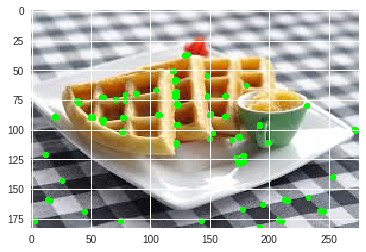

In [0]:
# corner thresholding

# idea is to only retain strong corners, and then draw them on the original 
# image

# np_array.max() -> returns the maximum value in that array

thresh = 0.1 * corners_dilated.max()
print(thresh)

# copy of the original image on which we shall draw

corner_waffle = np.copy(waffle_1)

# looping through all the image pixels, and then finding the strongest corners
# to draw a circle on
# comment: remember that the syntax for drawing a circle requires the center 
# point to be (x, y) and not (y, x) i.e. it requires the column first, and the 
# row later

for i in range(0, corners_dilated.shape[0]):
  for j in range(0, corners_dilated.shape[1]):
    if corners_dilated[i][j] >= thresh:
      cv2.circle(corner_waffle, (j, i), 1, (0, 255, 0), 1)

plt.figure()
plt.imshow(corner_waffle)

# 2. Dilation and Erosion

(150, 112, 3)


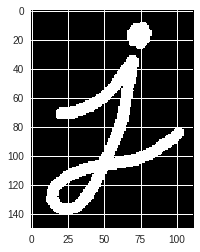

In [0]:
# image on which morphological operations are to be performed

imagej = cv2.imread('j.png')

image_j = np.copy(imagej)
print(image_j.shape)

img_j = cv2.cvtColor(image_j, cv2.COLOR_BGR2RGB)

plt.imshow(img_j, cmap = 'gray')

In [0]:
# creating the morphological kernel 

# np.ones((a, b), np.dtype) -> returns an np array of size (a, b) having 
# all values equalling one with a datatype of np.dtype

kernel = np.ones((5,5), np.uint8)

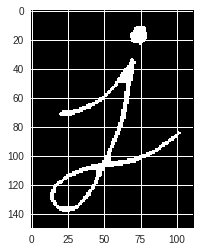

In [0]:
# eroding -> thins the foreground

# cv2.erode(image, kernel, iterations) -> returns an eroded image dilated using 
# the supplied kernel; the number of iterations imply the number of times 
# erosion has to be performed

erode = cv2.erode(img_j, kernel, 1)

plt.imshow(erode, cmap = 'gray')

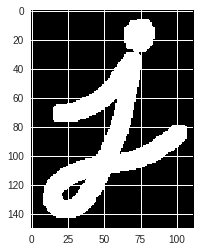

In [0]:
# dilating -> thickens the foreground

# cv2.dilate(image, kernel, iterations) -> returns a dilated image dilated using 
# the supplied kernel; the number of iterations imply the number of times 
# dilation has to be performed

dilate = cv2.dilate(img_j, kernel, 1)

plt.imshow(dilate, cmap = 'gray')

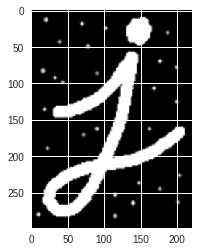

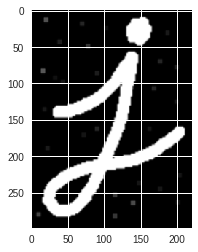

In [0]:
# opening -> erosion followed by dilation; can be used to remove specky noise in
# the background while retaining the size of the foreground

j_noise = cv2.imread('j_noise.PNG')

j_n = np.copy(j_noise)
j_n = cv2.cvtColor(j_n, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(j_n, cmap = 'gray')

# cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel) -> returns an opened image 
# opened using the supplied kernel

j_open = cv2.morphologyEx(j_n, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.imshow(j_open, cmap = 'gray')

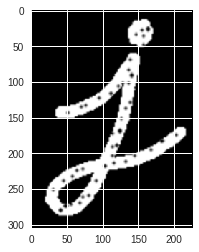

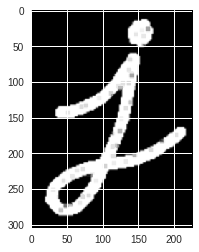

In [0]:
# closing -> dilation followed by erosion; can be used to remove specky noise 
# within the foreground while retaining the size of the foreground

j_noise = cv2.imread('j_noise_1.PNG')

j_n = np.copy(j_noise)
j_n = cv2.cvtColor(j_n, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(j_n, cmap = 'gray')

# cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel) -> returns a closed image 
# closed using the supplied kernel

j_closed = cv2.morphologyEx(j_n, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.imshow(j_closed, cmap = 'gray')

# 3. Find Contours and Features

(339, 509, 3)
(339, 509)
225.0


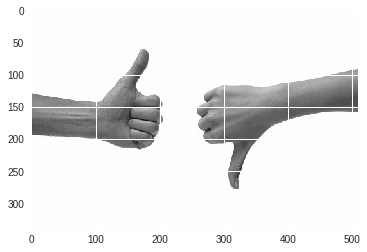

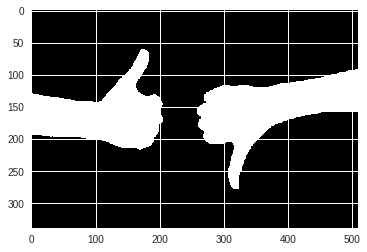

In [4]:
# contours -> complete closed boundaries relevant for segmentation
# contours are continuous curves formed by following the edges along a boundary
# contours are useful because they can provide useful information about the 
# shape of an object

# important: before finding contours (contouring), threshold the image -> white
# object black background

# image of thumb

thumb = cv2.imread(os.path.join(image_directory, 'thumbs_up_down.jpg'))

thumb_1 = np.copy(thumb)
thumb_1 = cv2.cvtColor(thumb_1, cv2.COLOR_BGR2RGB)
thumb_g = cv2.cvtColor(thumb_1, cv2.COLOR_RGB2GRAY)

print(thumb.shape)
print(thumb_g.shape)

plt.imshow(thumb_g, cmap = 'gray')

# thresholding the image

# cv2.threshold(gray_scale_image, threshold, new value of those pixels which 
# were above threshold, thresholding method) -> returns the threshold, and a
# thresholded image 
# cv2.THRESH_BINARY_INV implies that the result will actually be reversed by 
# converting all the low values high, and all the high values low

thresh, binary_thumb = cv2.threshold(thumb_g, 225, 255, cv2.THRESH_BINARY_INV)

print(thresh)

plt.figure()
plt.imshow(binary_thumb, cmap = 'gray')

(339, 509)
2
(1, 2, 4)


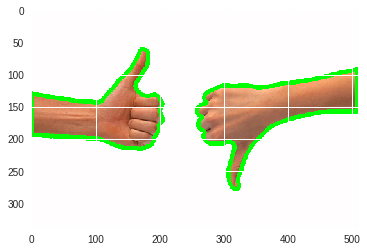

In [5]:
# contour extraction

# cv2.findContours(binary_image, storage_method, contour_method) -> returns the
# original image as well as the list (not numpy array) of the contours along 
# with their associated hierarchies
# cv2.RETR_TREE simply refers to a particular hierarchy
# cv2.CHAIN_APPROX_SIMPLE refers to a contouring method

retval, contours, heirarchy = cv2.findContours(binary_thumb, cv2.RETR_TREE, 
                                               cv2.CHAIN_APPROX_SIMPLE)

print(retval.shape)
print(len(contours))
print(heirarchy.shape)

thumb_d = np.copy(thumb_1)

# cv2.drawContours(image, contour_list, which_contour_to_draw, color, thickness)
# -> draws the contours on the image, and returns that image
# -1 implies that all contours are needed to be drawn

thumb_d = cv2.drawContours(thumb_d, contours, -1, (0, 255, 0), 5)

plt.imshow(thumb_d)

In [7]:
## TODO: Complete this function so that 
## it returns the orientations of a list of contours
## the list should be in the same order as the contours
## i.e. the first angle should be the orientation of the first contour

def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list

    angles = []
    for i in contours:
      
      # cv2.fitEllipse(contour) -> returns the center point of the bounding 
      # ellipse (x, y) as well as the major and minor axes (MA, ma), and the 
      # angle of orientation of the ellipse
      
      (x,y), (MA,ma), angle = cv2.fitEllipse(i)
      angles.append(angle)    
    
    return angles


# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


1


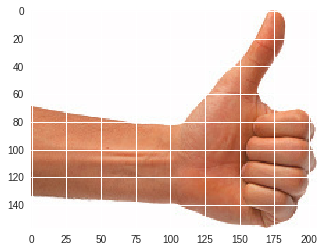

In [8]:
## TODO: Complete this function so that
## it returns a new, cropped version of the original image
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    ## TODO: Detect the bounding rectangle of the left hand contour
    
    # cv2.boundingRect(contour) -> returns the x, y, width, height of the 
    # selected contour
    
    x, y, w, h = cv2.boundingRect(selected_contour)

    ## TODO: Crop the image using the dimensions of the bounding rectangle
    
    # Make a copy of the image to crop
    
    cropped_image = np.copy(image)
    cropped_image = cropped_image[y : y + h, x : x + w]

    return cropped_image


## TODO: Select the left hand contour from the list

# since the image was such that the angle of the ellipse bounding the left hand
# will be greater than the one bounding the right hand, we can find the left
# hand contour automatically 

a = angles.index(max(angles))
print(a)

left_hand_contour = contours[a]

thumb_crop = np.copy(thumb_1)

left = left_hand_crop(thumb_crop, left_hand_contour)

plt.figure()
plt.imshow(left)

# 4. K-means Clustering 

(2000, 3008, 3)
33
66
23
(6016000, 3)
33
66
23


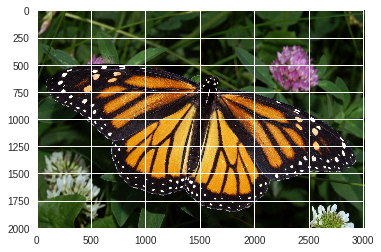

In [9]:
# morach image

monarch_1 = cv2.imread(os.path.join(image_directory, 'monarch.jpg'))
print(monarch_1.shape)

monarch = np.copy(monarch_1)
monarch = cv2.cvtColor(monarch, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(monarch)

# converting data to a type suitable for k-means

print(monarch[0,0,0])
print(monarch[0,0,1])
print(monarch[0,0,2])

# np.reshape(array, (-1, m)) -> returns a numpy array which has 'm' columns
# and the number of rows is decided accordingly

# in this case, the reshaping took place as follows: the entire red channel 
# became column 0, the entire green channel became column 1, and the entire blue
# channel became column 2

m = np.reshape(monarch, (-1, 3))
print(m.shape)

print(m[0,0])
print(m[0,1])
print(m[0,2])

m = np.float32(m)

In [0]:
# criterion implies the methodology according to which k-means will end

criterion = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# k implies the number of clusters to be formed

k = 2

# cv2.kmeans(array, no_of_clusters, labels we want, criterion according to
# which k-means is going to be evaluated, no of attempts, method to intitialize
# center points) -> returns three things: retval being compactness i.e. the sum
# of squared distance of each point from its associated center, labels being a 
# numpy array containing the label of each pixel (for example, 0 or 1 in case 
# of two clusters), centers being the array containing the center pixels of each
# cluster

retval, labels, centers = cv2.kmeans(m, k, None, criterion, 10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

In [45]:
print(retval)
print(labels.shape)
print(centers.shape)

print(centers)

17626058873.353233
(6016000, 1)
(2, 3)
[[ 34.42457   42.464508  21.523552]
 [196.63321  147.17165   78.25131 ]]


(6016000, 3)
int32
1


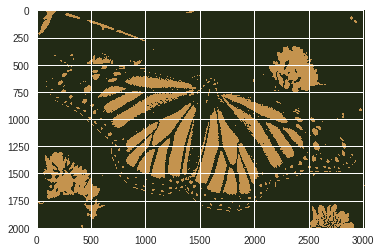

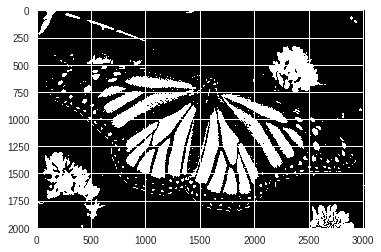

In [46]:
# idea: to create a r x 3 array -> segmented_data such that every point in that
# array is one of the centers of the k-means cluster
# for example: if the centers were [[2, 1, 1], [4, 5, 6]] and the labels were 
# [0, 0, 0, 1, 0, 1] then the segmented data becomes -> [[2, 1, 1], [2, 1, 1],
# [2, 1, 1], [4, 5, 6], [2, 1, 1], [4, 5, 6]]

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

print(segmented_data.shape)

# reshape data into the original image dimensions

# now we need to reshape our segmented data from an r x 3 format to the original
# image dimensions 

segmented_image = segmented_data.reshape((monarch.shape))

# the labels array can also be reshaped according to the height and width of the
# image as this can serve as a mask

labels_reshape = labels.reshape(monarch.shape[0], monarch.shape[1])

plt.imshow(segmented_image, cmap = 'gray')

print(labels_reshape.dtype)

# the reshaped labels image will have pixels having values identical to the 
# label they were assigned (for example, in the case of 3 labels, the pixels 
# will have values 0, 1, 2)

print(labels_reshape.max())
plt.figure()
plt.imshow(labels_reshape, cmap = 'gray')

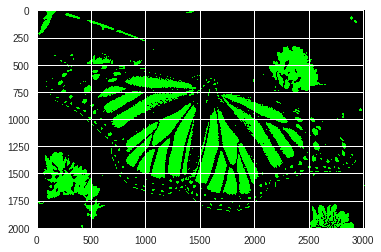

In [48]:
# masking according to labels

masked_monarch = np.copy(monarch)

masked_monarch[labels_reshape == 1] = [0, 255, 0]
masked_monarch[labels_reshape != 1] = [0, 0, 0]

plt.figure()
plt.imshow(masked_monarch)